<a href="https://colab.research.google.com/github/amrios80/MINE_4206_AML_202610/blob/main/labs/lab_1/MINE_4206_AML_202610_L1_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo AML](https://github.com/nicolastibata/MINE_4206_AML_202610/blob/main/docs/logo.jpg?raw=true)

# **Laboratorio 1 - Sesión 2: Regresión Polinomial y Regularizada**
**Tutor: Nicolás Tibatá**

## **Tabla de Contenido**

[Contexto y objetivos](#scrollTo=kgcjzQ76ODRS)<br>
[1. Introducción de los datos](#scrollTo=2dNwUTBZO8OE)<br>
[2. Preparación y Modelamiento](#scrollTo=SlV42CI6PBoQ)<br>
[3. Preguntas](#scrollTo=OCwUBTvxPRdS)<br>

### **Contexto y Objetivos**

Reducir las emisiones de CO2 es crucial para mitigar el cambio climático y minimizar sus efectos nocivos sobre el medio ambiente y el bienestar humano. Esto implica hacer la transición a fuentes de energía más limpias y renovables, mejorar la eficiencia energética, adoptar prácticas sostenibles y promover esfuerzos de conservación. El set de datos reúne información de emisiones de automotores e información de consumo de combustible.

- Ver las implicaciones de las regularizaciones y relaciones polinomiales.
- Aplicar pipelines para el preprocesamiento de datos, aplicar diferentes tipos de escaladores.
- Realizar una busqueda del mejor modelo.

**Datos:** [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions)

**Diccionario**
| Columna | Descripción |
| :--- | :--- |
| **Make** | Nombre del fabricante de automotores. |
| **Model** | Modelo del automotor. |
| **Vehicle Class** | Clase de vehículo. |
| **Engine Size (L)** | Tamaño del motor. Las unidades están expresadas en litros. |
| **Transmission** | Tipo de transmisión del vehículo, automática o manual. |
| **Fuel Type** | Tipo de combustible: *Regular Gasoline* (X), *Premium Gasoline* (Z), *Ethanol* (E), *Diesel* (D), *Natural Gas* (N). |
| **Fuel Consumption City (L/100km)** | Consumo del vehículo en ciudad. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Hwy (L/100 km)** | Consumo del vehículo en carretera. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Comb (L/100 km)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en litros por kilómetro.|
| **Fuel Consumption Comb (mpg)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en millas por galón. |
| **CO2 Emissions(g/km)** | Cantidad de gramos emitidos de C02 por kilometro. |

### **1. Introducción a los datos**

In [1]:
# Importamos o instalamos librerias necesarias
!pip install ydata-profiling -q
from ydata_profiling import ProfileReport
# Acceso a credenciales
import os
from google.colab import files
from google.colab import userdata
# Manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelamiento
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00


Cargamos los datos directamente de kaggle con las credenciales personales, pueden consultar cómo funciona [acá](https://www.kaggle.com/discussions/general/74235#2580958).

In [4]:
from google.colab import userdata
userdata.get('adrianamariarios')

'636170a31f11fe8cb07f3204ae8200b7'

In [7]:
os.environ["KAGGLE_KEY"] = userdata.get('adrianamariarios')
os.environ["KAGGLE_USERNAME"] = userdata.get('adrianamariarios')

!kaggle datasets download -d bhuviranga/co2-emissions
!unzip "co2-emissions.zip"

Dataset URL: https://www.kaggle.com/datasets/bhuviranga/co2-emissions
License(s): DbCL-1.0
  0% 0.00/87.7k [00:00<?, ?B/s]
100% 87.7k/87.7k [00:00<00:00, 221MB/s]
Archive:  co2-emissions.zip
  inflating: CO2 Emissions.csv       


In [8]:
data = pd.read_csv('CO2 Emissions.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [9]:
data

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

### **2. Preparación y Modelamiento**

Antes de preparar y modelar los datos, veamos un poco cómo se constituyen

In [10]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 34.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**¿Cuáles son los insights que encontramos?**
- `Model` es una variable con muchos valores únicos (2053) lo cual hace que dicha variable se considere con una alta cardinalidad, esto genera ruido estadístico a nuestros modelos o problemas de alta dimensionalidad.
- `Vehicle Type` es una variable que por sus características de cilindraje, engine size o el consumo son intrisecamente relacionadas, por lo tanto podemos descartarla.
- Encontramos registros duplicados por lo tanto debemos eliminarlos.
- Encontramos datos ausentes dentro de las columnas, en este caso en nuestro pipeline aplicamos un imputador de ausencias.

#### **Preparación**

In [11]:
# 1. Separar los datos en entrenamiento y test -> SIEMPRE
train_data, test_data = train_test_split(data, test_size=0.2, random_state=71)

In [ ]:
# Variables a eliminar
drop_fields = ['Model', 'Vehicle Class']
# Variable objetivo
target_feature = 'CO2 Emissions(g/km)'
# Variables categoricas
categorical_features = ['Make', 'Transmission', 'Fuel Type']

# Preprocesamiento
def preprocess(df):
  print(f"Total de filas duplicadas eliminadas: {df.duplicated().sum().sum()}")
  df = df.drop_duplicates() # Eliminamos duplicados
  df = df.drop(drop_fields, axis = 1) # Eliminamos columnas que no vamos a usar
  X_data, y_variable = df.drop([target_feature], axis=1), df[target_feature] # Separamos nuestro target de las variables explicativas
  return X_data, y_variable

In [ ]:
X_train, y_train = preprocess(train_data)
display(X_train)
display(y_train)

Total de filas duplicadas eliminadas: 733


Make  Engine Size(L)  Cylinders Transmission Fuel Type  \
4278         TOYOTA             2.0          4          AS6         Z   
1620       INFINITI             3.7          6          AS7         Z   
2317            BMW             3.0          6           M6         Z   
1078          ACURA             2.4          4          AM8         Z   
4789           FORD             5.0          8         AS10         X   
...             ...             ...        ...          ...       ...   
1320      CHEVROLET             2.4          4           A6         E   
1576          HONDA             2.4          4           AV         X   
5175  MERCEDES-BENZ             4.0          8           A9         Z   
3083         NISSAN             1.6          4           A4         X   
4013       MASERATI             3.0          6          AS8         Z   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
4278                               9.9                              7.3   
1620                              12.0                              8.1   
2317                              12.7                              9.2   
1078                               9.6                              6.6   
4789                              15.5                             10.0   
...                                ...                              ...   
1320                              16.3                             11.6   
1576                               9.1                              7.2   
5175                              13.1                              8.8   
3083                               8.8                              6.6   
4013                              14.9                             10.3   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  
4278                               8.7                           32  
1620                              10.3                           27  
2317                              11.1                           25  
1078                               8.3                           34  
4789                              13.1                           22  
...                                ...                          ...  
1320                              14.2                           20  
1576                               8.3                           34  
5175                              11.2                           25  
3083                               7.8                           36  
4013                              13.1                           22  

[5175 rows x 9 columns]

4278    204
1620    237
2317    260
1078    191
4789    305
       ... 
1320    227
1576    191
5175    261
3083    184
4013    300
Name: CO2 Emissions(g/km), Length: 5175, dtype: int64

In [ ]:
# Definamos las variables numericas
num_features = list(set(X_train.columns) - set(categorical_features))
num_features

['Fuel Consumption Comb (mpg)',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Cylinders',
 'Fuel Consumption Hwy (L/100 km)',
 'Engine Size(L)']

##### **Pipeline**

¿Qué es un pipeline? El pipeline permite ensamblar varios pasos y validarlos de forma cruzada mientras se ajustan diferentes parámetros. Esto nos sirve para replicar nuestro procesamiento a diferentes set de datos o diferentes algoritmos sin tener que pasar otra vez por todas las lineas de código.

In [ ]:
# 1. Funciones complementarias

# Funcion que hace rename a las categorias
def fix_cat_values(df):
  for column in df.columns:
    if column == 'Fuel Type':
      fuel_labels = {'X': 'Regular Gasoline', 'Z': 'Premium Gasoline', 'E': 'Ethanol', 'D': 'Diesel', 'N': 'Natural Gas'}
      df['Fuel Type'] = df['Fuel Type'].replace(fuel_labels)
    elif column == 'Transmission':
      df['Transmission'] = df['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')
  return df

In [ ]:
# 2. Construcción del Pipeline

# num_transformer reemplaza los valores ausentes por el mean para las variables numéricas
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ]
)

# cat_transformer aplica de primer paso nuestra funcion complementaria y luego sobre ese resultado aplica OneHotEncoder
cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

Una vez que hemos definido los transformadores, definimos los pasos (`steps`), que permitirán construir y ejecutar el Pipeline. Los pasos son los siguientes:

1.   `num`, incluye el transformador numérico y la relación de las columnas numéricas haciendo uso de `make_column_selector`.
2.   `cat`, incluye el transformador categórico y la relación de dichas columnas haciendo uso de `make_column_selector`.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

In [ ]:
# Visualizamos nuestro pipeline
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d9933c413d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7d9933337600>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d99335dc080>)]))])

In [ ]:
pipe.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 46575 stored elements and shape (5175, 55)>

In [ ]:
cat_column_names = pipe['column_transformer'].transformers_[1][1][1].get_feature_names_out()
num_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
col_names = list(num_column_names) + list(cat_column_names)

col_names

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'Make_ACURA',
 'Make_ALFA ROMEO',
 'Make_ASTON MARTIN',
 'Make_AUDI',
 'Make_BENTLEY',
 'Make_BMW',
 'Make_BUGATTI',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FIAT',
 'Make_FORD',
 'Make_GENESIS',
 'Make_GMC',
 'Make_HONDA',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_JAGUAR',
 'Make_JEEP',
 'Make_KIA',
 'Make_LAMBORGHINI',
 'Make_LAND ROVER',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MASERATI',
 'Make_MAZDA',
 'Make_MERCEDES-BENZ',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_PORSCHE',
 'Make_RAM',
 'Make_ROLLS-ROYCE',
 'Make_SCION',
 'Make_SMART',
 'Make_SRT',
 'Make_SUBARU',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Fuel Type_Diesel',
 'Fuel Type_Ethanol',
 'Fuel Type_Natural Gas',
 'Fuel Type

In [ ]:
pd.DataFrame(pipe.fit_transform(X_train).toarray(), columns=col_names)

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0        4.0                               9.9   
1                3.7        6.0                              12.0   
2                3.0        6.0                              12.7   
3                2.4        4.0                               9.6   
4                5.0        8.0                              15.5   
...              ...        ...                               ...   
5170             2.4        4.0                              16.3   
5171             2.4        4.0                               9.1   
5172             4.0        8.0                              13.1   
5173             1.6        4.0                               8.8   
5174             3.0        6.0                              14.9   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 7.3                               8.7   
1                                 8.1                              10.3   
2                                 9.2                              11.1   
3                                 6.6                               8.3   
4                                10.0                              13.1   
...                               ...                               ...   
5170                             11.6                              14.2   
5171                              7.2                               8.3   
5172                              8.8                              11.2   
5173                              6.6                               7.8   
5174                             10.3                              13.1   

      Fuel Consumption Comb (mpg)  Make_ACURA  Make_ALFA ROMEO  \
0                            32.0         0.0              0.0   
1                            27.0         0.0              0.0   
2                            25.0         0.0              0.0   
3                            34.0         1.0              0.0   
4                            22.0         0.0              0.0   
...                           ...         ...              ...   
5170                         20.0         0.0              0.0   
5171                         34.0         0.0              0.0   
5172                         25.0         0.0              0.0   
5173                         36.0         0.0              0.0   
5174                         22.0         0.0              0.0   

      Make_ASTON MARTIN  Make_AUDI  ...  Make_TOYOTA  Make_VOLKSWAGEN  \
0                   0.0        0.0  ...          1.0              0.0   
1                   0.0        0.0  ...          0.0              0.0   
2                   0.0        0.0  ...          0.0              0.0   
3                   0.0        0.0  ...          0.0              0.0   
4                   0.0        0.0  ...          0.0              0.0   
...                 ...        ...  ...          ...              ...   
5170                0.0        0.0  ...          0.0              0.0   
5171                0.0        0.0  ...          0.0              0.0   
5172                0.0        0.0  ...          0.0              0.0   
5173                0.0        0.0  ...          0.0              0.0   
5174                0.0        0.0  ...          0.0              0.0   

      Make_VOLVO  Transmission_Automatic  Transmission_Manual  \
0            0.0                     1.0                  0.0   
1            0.0                     1.0                  0.0   
2            0.0                     0.0                  1.0   
3            0.0                     1.0                  0.0   
4            0.0                     1.0                  0.0   
...          ...                     ...                  ...   
5170         0.0                     1.0                  0.0   
5171         0.0                     1.0                  0.0   
5172         0.0     

Si quieres saber más sobre como funciona el OneHotEncoder: o sus alternativas, lo puedes consultar [acá](https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc)

#### **Modelamiento**

##### **Modelo: Regresión Lineal**

In [ ]:
estimators_lr = [
        ('transform',preprocessor),
        ('regression', LinearRegression())
]

pipe_lr = Pipeline(estimators_lr)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d9933c413d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7d9933337600>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d99335dc080>)])),
                ('regression', LinearRegression())])

In [ ]:
coef_lr = dict(zip(col_names, pipe_lr["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.64
Cylinders = 0.91
Fuel Consumption City (L/100 km) = 6.59
Fuel Consumption Hwy (L/100 km) = 6.18
Fuel Consumption Comb (L/100 km) = 6.64
Fuel Consumption Comb (mpg) = -1.03
Make_ACURA = -4.34
Make_ALFA ROMEO = -1.22
Make_ASTON MARTIN = 0.38
Make_AUDI = -2.31
Make_BENTLEY = 4.28
Make_BMW = -2.74
Make_BUGATTI = 22.73
Make_BUICK = -0.80
Make_CADILLAC = -1.46
Make_CHEVROLET = -0.40
Make_CHRYSLER = 3.09
Make_DODGE = 0.71
Make_FIAT = -1.37
Make_FORD = 1.67
Make_GENESIS = 2.07
Make_GMC = -0.39
Make_HONDA = -0.96
Make_HYUNDAI = 0.40
Make_INFINITI = -3.14
Make_JAGUAR = -2.20
Make_JEEP = 0.39
Make_KIA = 0.03
Make_LAMBORGHINI = 6.97
Make_LAND ROVER = -2.74
Make_LEXUS = -3.63
Make_LINCOLN = 1.08
Make_MASERATI = 2.65
Make_MAZDA = -1.73
Make_MERCEDES-BENZ = -1.97
Make_MINI = -2.85
Make_MITSUBISHI = -1.94
Make_NISSAN = -0.68
Make_PORSCHE = -2.84
Make_RAM = 1.33
Make_ROLLS-ROYCE = 3.46
Make_SCION = -3.31
Make_SMART = -3.02
Make_SRT = 1.48
Make_SUBARU = -2.11
Make_TOYOTA = 0.08
Mak

In [ ]:
# Evaluemos el modelo
# 1. Apliquemos los mismos pasos al conjunto de test
X_test, y_test = preprocess(test_data)
display(X_test)
display(y_test)

Total de filas duplicadas eliminadas: 45


Make  Engine Size(L)  Cylinders Transmission Fuel Type  \
3193      SUBARU             2.0          4          AV8         Z   
3303       VOLVO             2.0          4          AS8         X   
281     CHRYSLER             3.6          6           A6         X   
7079  LAND ROVER             2.0          4          AS9         Z   
3496   CHEVROLET             2.5          4           M6         X   
...          ...             ...        ...          ...       ...   
5418  VOLKSWAGEN             2.0          4          AS6         X   
2459   CHEVROLET             1.8          4          AS6         X   
6143       MAZDA             2.5          4          AS6         X   
3378         BMW             2.0          4          AS8         Z   
5422  VOLKSWAGEN             1.8          4           M5         X   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
3193                              10.2                              8.5   
3303                              10.3                              7.6   
281                               12.5                              8.1   
7079                              11.8                              8.7   
3496                              12.2                              9.2   
...                                ...                              ...   
5418                               9.0                              7.2   
2459                               9.6                              6.7   
6143                               9.1                              6.7   
3378                               9.8                              6.8   
5422                               9.3                              6.9   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  
3193                               9.4                           30  
3303                               9.1                           31  
281                               10.5                           27  
7079                              10.4                           27  
3496                              10.9                           26  
...                                ...                          ...  
5418                               8.2                           34  
2459                               8.3                           34  
6143                               8.0                           35  
3378                               8.4                           34  
5422                               8.2                           34  

[1432 rows x 9 columns]

3193    222
3303    213
281     242
7079    245
3496    254
       ... 
5418    191
2459    195
6143    187
3378    197
5422    192
Name: CO2 Emissions(g/km), Length: 1432, dtype: int64

In [ ]:
y_pred_test_lr = pipe_lr.predict(X_test)
y_pred_test_lr

array([220.5979188 , 210.90152712, 250.33655237, ..., 187.12554776,
       196.0662053 , 190.82450542])

Así de facil con `pipe_lr` aplicamos los pasos del preprocesamiento y además evaluamos nuestro modelo con el conjunto de test

In [ ]:
n,p = X_test.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test_lr))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test_lr) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test_lr) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test_lr))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 22.30
Root of sum of squares (RMSE): 4.72
R2-score: 0.99348
Adj R2-score: 0.99344


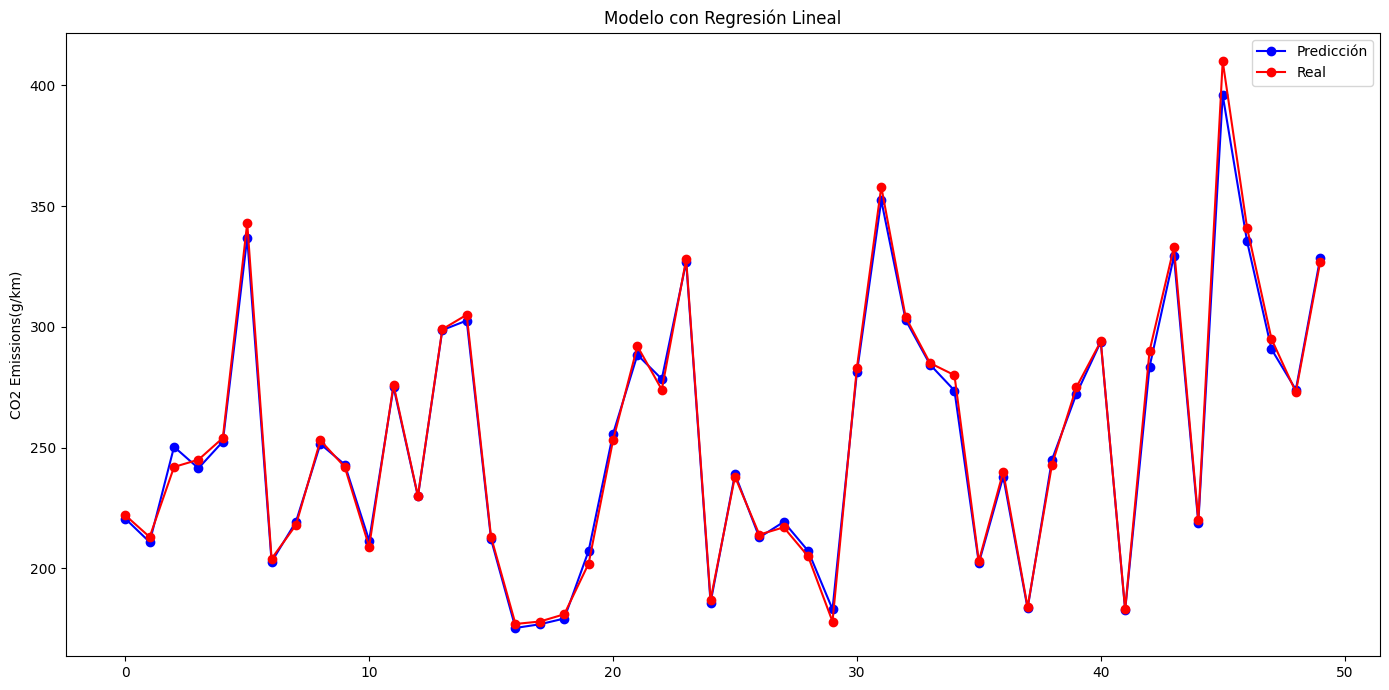

In [ ]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred_test_lr[:50],'bo-', label='Predicción')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Lineal', ylabel=y_test.name)
axs.legend()

plt.tight_layout()
plt.show()

##### **Modelo: Regresión Polinomial**

In [ ]:
estimators_poly = [
        ('transform',preprocessor),
        ('poly',PolynomialFeatures(degree=3)),
        ('regression', LinearRegression())
]

pipe_poly = Pipeline(estimators_poly)

pipe_poly.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d9933c413d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7d9933337600>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d99335dc080>)])),
                ('poly', PolynomialFeatures(degree=3)),
                ('regression', LinearRegression())])

In [ ]:
coef_lr = dict(zip(col_names, pipe_poly["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = -0.00
Cylinders = 0.01
Fuel Consumption City (L/100 km) = 0.01
Fuel Consumption Hwy (L/100 km) = 0.02
Fuel Consumption Comb (L/100 km) = 0.01
Fuel Consumption Comb (mpg) = 0.02
Make_ACURA = -0.04
Make_ALFA ROMEO = -0.00
Make_ASTON MARTIN = -0.00
Make_AUDI = -0.00
Make_BENTLEY = 0.00
Make_BMW = 0.00
Make_BUGATTI = -0.00
Make_BUICK = 0.00
Make_CADILLAC = -0.00
Make_CHEVROLET = -0.00
Make_CHRYSLER = -0.00
Make_DODGE = -0.00
Make_FIAT = 0.00
Make_FORD = -0.00
Make_GENESIS = 0.00
Make_GMC = 0.00
Make_HONDA = -0.00
Make_HYUNDAI = 0.00
Make_INFINITI = 0.00
Make_JAGUAR = -0.00
Make_JEEP = 0.00
Make_KIA = -0.00
Make_LAMBORGHINI = -0.00
Make_LAND ROVER = -0.00
Make_LEXUS = -0.00
Make_LINCOLN = -0.00
Make_MASERATI = 0.00
Make_MAZDA = -0.00
Make_MERCEDES-BENZ = -0.00
Make_MINI = 0.00
Make_MITSUBISHI = -0.00
Make_NISSAN = -0.00
Make_PORSCHE = 0.00
Make_RAM = -0.00
Make_ROLLS-ROYCE = -0.00
Make_SCION = 0.00
Make_SMART = -0.00
Make_SRT = 0.00
Make_SUBARU = 0.00
Make_TOYOTA = 0.00
Mak

In [ ]:
# Evaluamos nuestro modelo con test
y_pred_test_poly = pipe_poly.predict(X_test)
y_pred_test_poly

array([218.54409648, 211.7077669 , 245.79017195, ..., 187.27260784,
       195.96943208, 191.16443261])

In [ ]:
n,p = X_test.shape

print('------------ Regresión con Transformación Polinomial ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test_poly))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test_poly) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test_poly) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test_poly))*(n-1)/(n-p-1)) )

------------ Regresión con Transformación Polinomial ------------
Sum of squares (MSE): 7.19
Root of sum of squares (RMSE): 2.68
R2-score: 0.99790
Adj R2-score: 0.99788


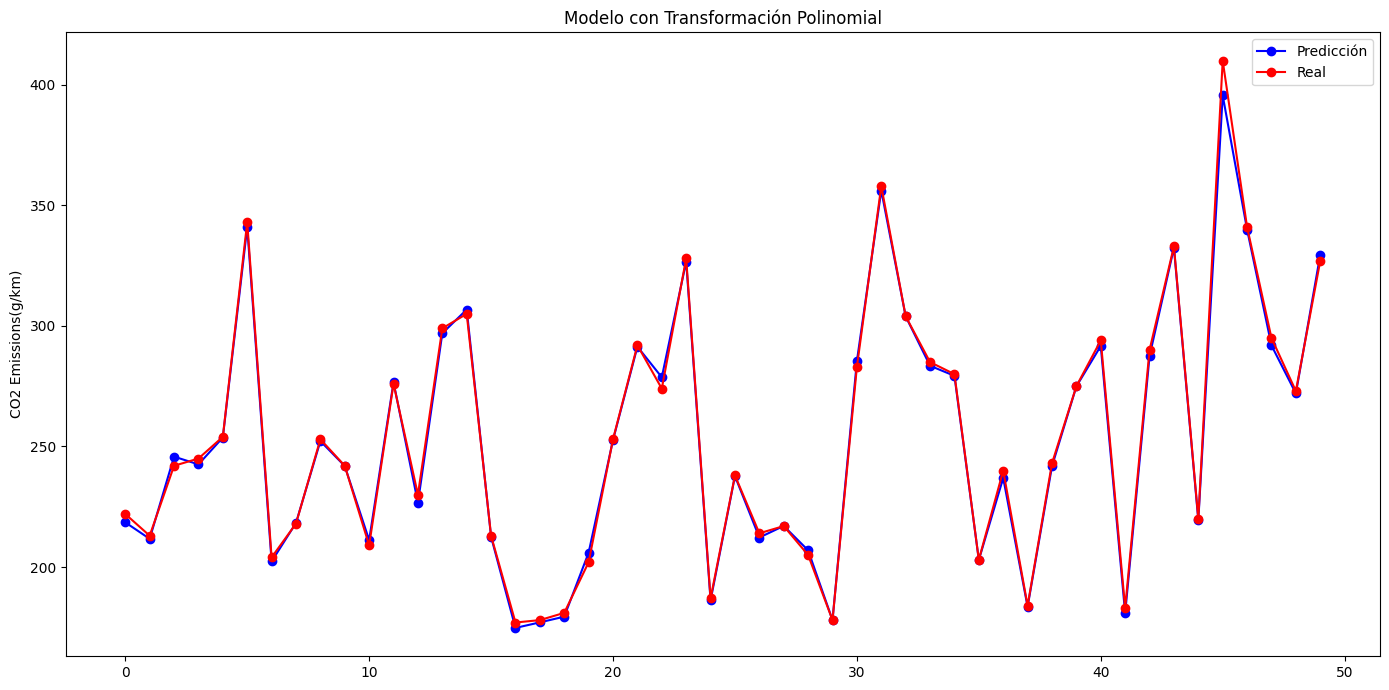

In [ ]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred_test_poly[:50],'bo-', label='Predicción')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Modelo con Transformación Polinomial', ylabel=y_test.name)
axs.legend()

plt.tight_layout()
plt.show()

##### **Modelo: Regresión Lineal con regularización L1**

In [ ]:
estimators_lasso = [
        ('transform',preprocessor),
        ('lasso', Lasso(alpha=8))
]

pipe_lasso = Pipeline(estimators_lasso)

pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d9933c413d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7d9933337600>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d99335dc080>)])),
                ('lasso', Lasso(alpha=8))])

In [ ]:
coef_lr = dict(zip(col_names, pipe_lasso["lasso"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.00
Cylinders = 5.79
Fuel Consumption City (L/100 km) = 4.14
Fuel Consumption Hwy (L/100 km) = 0.00
Fuel Consumption Comb (L/100 km) = 0.00
Fuel Consumption Comb (mpg) = -4.34
Make_ACURA = -0.00
Make_ALFA ROMEO = -0.00
Make_ASTON MARTIN = 0.00
Make_AUDI = -0.00
Make_BENTLEY = 0.00
Make_BMW = -0.00
Make_BUGATTI = 0.00
Make_BUICK = -0.00
Make_CADILLAC = 0.00
Make_CHEVROLET = 0.00
Make_CHRYSLER = -0.00
Make_DODGE = -0.00
Make_FIAT = -0.00
Make_FORD = -0.00
Make_GENESIS = 0.00
Make_GMC = 0.00
Make_HONDA = -0.00
Make_HYUNDAI = 0.00
Make_INFINITI = -0.00
Make_JAGUAR = -0.00
Make_JEEP = 0.00
Make_KIA = 0.00
Make_LAMBORGHINI = 0.00
Make_LAND ROVER = 0.00
Make_LEXUS = -0.00
Make_LINCOLN = 0.00
Make_MASERATI = 0.00
Make_MAZDA = -0.00
Make_MERCEDES-BENZ = 0.00
Make_MINI = -0.00
Make_MITSUBISHI = -0.00
Make_NISSAN = 0.00
Make_PORSCHE = -0.00
Make_RAM = 0.00
Make_ROLLS-ROYCE = 0.00
Make_SCION = -0.00
Make_SMART = 0.00
Make_SRT = 0.00
Make_SUBARU = -0.00
Make_TOYOTA = 0.00
Make_VOL

In [ ]:
# Evaluamos nuestro modelo
y_pred_test_lasso = pipe_lasso.predict(X_test)
y_pred_test_lasso

array([220.50890274, 216.58450038, 254.63099134, ..., 194.26344692,
       201.49957128, 199.42974504])

In [ ]:
n,p = X_test.shape

print('------------ Regresión Lasso ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test_lasso))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test_lasso) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test_lasso))*(n-1)/(n-p-1)) )

------------ Regresión Lasso ------------
Sum of squares (MSE): 394.14
Root of sum of squares (RMSE): 19.85
R2-score: 0.88478
Adj R2-score: 0.88405


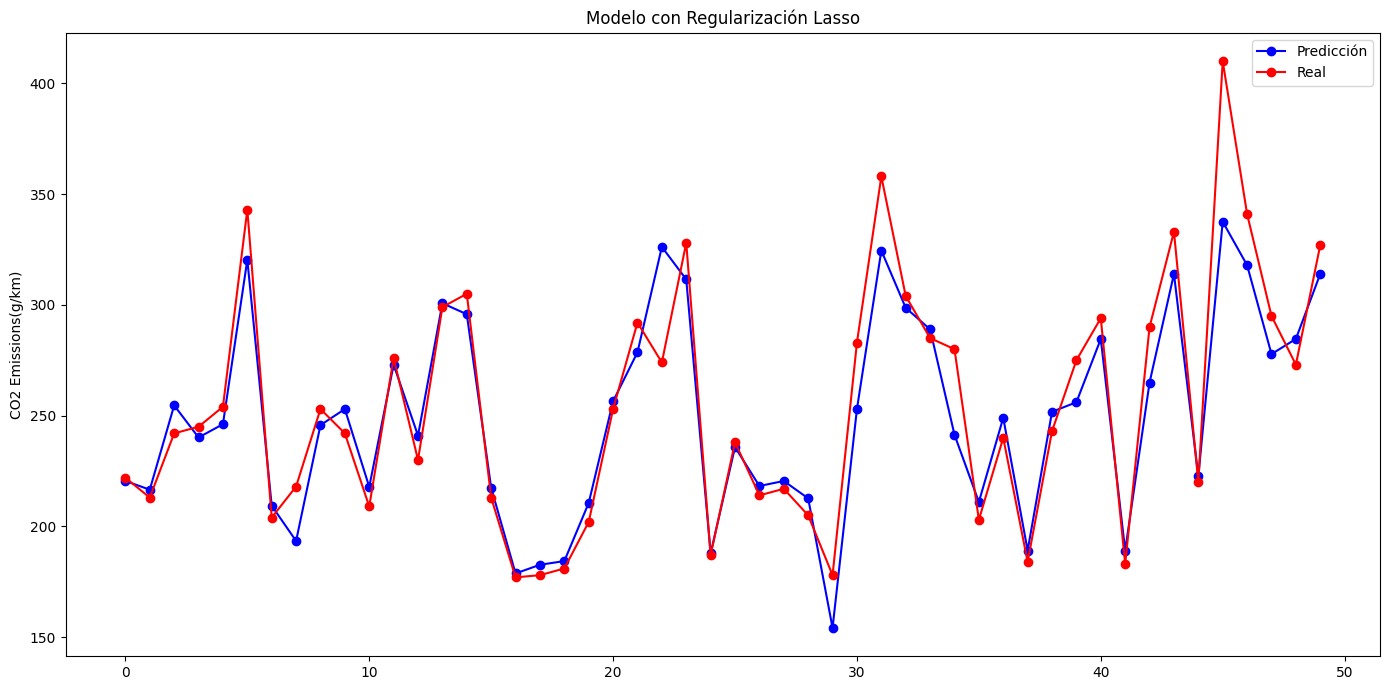

In [ ]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred_test_lasso[:50],'bo-', label='Predicción')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Modelo con Regularización Lasso', ylabel=y_test.name)
axs.legend()

plt.tight_layout()
plt.show()

##### **Búsqueda del mejor modelo**

En este caso no solo usaremos un único modelo, sino diferentes combinaciones posibles. Para esto usamos Grid Search CV

In [ ]:
estimators_best = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', Lasso())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'regression__alpha': [0.01, 1],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5)

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10757.472367057297, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   7.6s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11819.21412068448, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   7.6s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12548.562235002155, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   7.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12495.267605673227, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   7.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9928.802436854286, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   7.3s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1489.6726343088885, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.2s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.2s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1533.5827275706906, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18500.904451884155, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   9.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18499.979292457952, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18417.114481354038, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.6s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17782.24331419749, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16772.01543798602, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.9s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEn

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9614.694934143161, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4350.514987564617, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6895.13935675814, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5016.828943912078, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.3s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   5.4s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_va

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18437.966731598804, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19807.211742331943, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18774.908408656782, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21024.538466576196, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16665.46542928189, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.8s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.8s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.6s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.5s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.3s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15008.114639544454, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  49.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15180.530461209552, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  49.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15249.791181042972, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  49.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14776.879020696128, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  49.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13755.254970807957, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  49.4s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEn

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7634.3055624976405, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  44.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5889.113820300379, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  44.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16350.22245792771, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  44.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2965.8736984908464, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  45.6s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   3.8s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.1s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   3.6s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  44.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24539.62778843538, tolerance: 1475.018724130435
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  45.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24739.144905452893, tolerance: 1478.0182437439626
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  45.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24381.025384031636, tolerance: 1454.6524965217393
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  45.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22692.67367060827, tolerance: 1432.162051086956
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  45.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22382.001190040926, tolerance: 1431.2072669323672
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr

[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  45.2s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unkno

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22742.17892350676, tolerance: 1817.8325199227054
  model = cd_fast.sparse_enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d9933c413d0>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          FunctionTransformer(func=<function fix_cat_values at 0x7d9933337600>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder...
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', Lasso())]),
             param_grid={'polinomial__degree': [2, 3],
                         'regression__alpha': [0.01, 1],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            OrdinalEncoder(handle_unknown='use_encoded_value',
                                                           unknown_value=0)],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.479641      0.085134         0.010784        0.001216   
1        7.182315      0.058466         0.010214        0.001291   
2        8.213651      0.733047         0.009603        0.000618   
3        0.007745      0.000201         0.000000        0.000000   
4        0.007573      0.000112         0.000000        0.000000   
5        0.005170      0.000063         0.000000        0.000000   
6        6.957934      0.073625         0.010986        0.003544   
7        1.849601      2.476229         0.010272        0.001392   
8        6.909978      0.743804         0.011204        0.001607   
9        0.007774      0.000254         0.000000        0.000000   
10       0.007338      0.000089         0.000000        0.000000   
11       0.005239      0.000378         0.000000        0.000000   
12      45.700366      0.136440         0.041717        0.005833   
13      44.478762      0.162736         0.031252        0.009636   
14      49.222746      0.145048         0.038302        0.008965   
15       0.017307      0.010839         0.000000        0.000000   
16       0.013761      0.001945         0.000000        0.000000   
17       0.008147      0.001486         0.000000        0.000000   
18      44.552856      0.520170         0.036246        0.008337   
19      11.876768     16.073657         0.027357        0.010212   
20      45.234783      0.144200         0.038364        0.020976   
21       0.010069      0.000146         0.000000        0.000000   
22       0.008303      0.001316         0.000000        0.000000   
23       0.005126      0.000142         0.000000        0.000000   

    param_polinomial__degree  param_regression__alpha  \
0                          2                     0.01   
1                          2                     0.01   
2                          2                     0.01   
3                          2                     0.01   
4                          2                     0.01   
5                          2                     0.01   
6                          2                     1.00   
7                          2                     1.00   
8                          2                     1.00   
9                          2                     1.00   
10                         2                     1.00   
11                         2                     1.00   
12                         3                     0.01   
13                         3                     0.01   
14                         3                     0.01   
15                         3                     0.01   
16                         3                     0.01   
17                         3                     0.01   
18                         3                     1.00   
19                         3                     1.00   
20                         3                     1.00   
21                         3                     1.00   
22                         3                     1.00   
23                         3                     1.00   

                                 param_transform__cat param_transform__num  \
0              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
1              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
2              OneHotEncoder(handle_unknown='ignore')          passthrough   
3   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
4   OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
5   OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   
6              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
7              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
8              OneHotEncoder(handle_unknown='ignore')          passthrough   
9   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
10  OrdinalEncoder(

In [ ]:
grid_search.best_params_

{'polinomial__degree': 2,
 'regression__alpha': 0.01,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': 'passthrough'}

In [ ]:
# Evaluamos nuestro modelo
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([202.73404967, 240.13522744, 257.92527088, ..., 261.76146538,
       182.04003416, 302.15870455])

In [ ]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train, y_pred_train) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

# No hay indicios de sobreajuste

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 7.46
Root of sum of squares (RMSE): 2.73
R2-score: 0.99788
Adj R2-score: 0.99787
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 7.24
Root of sum of squares (RMSE): 2.69
R2-score: 0.99788
Adj R2-score: 0.99787


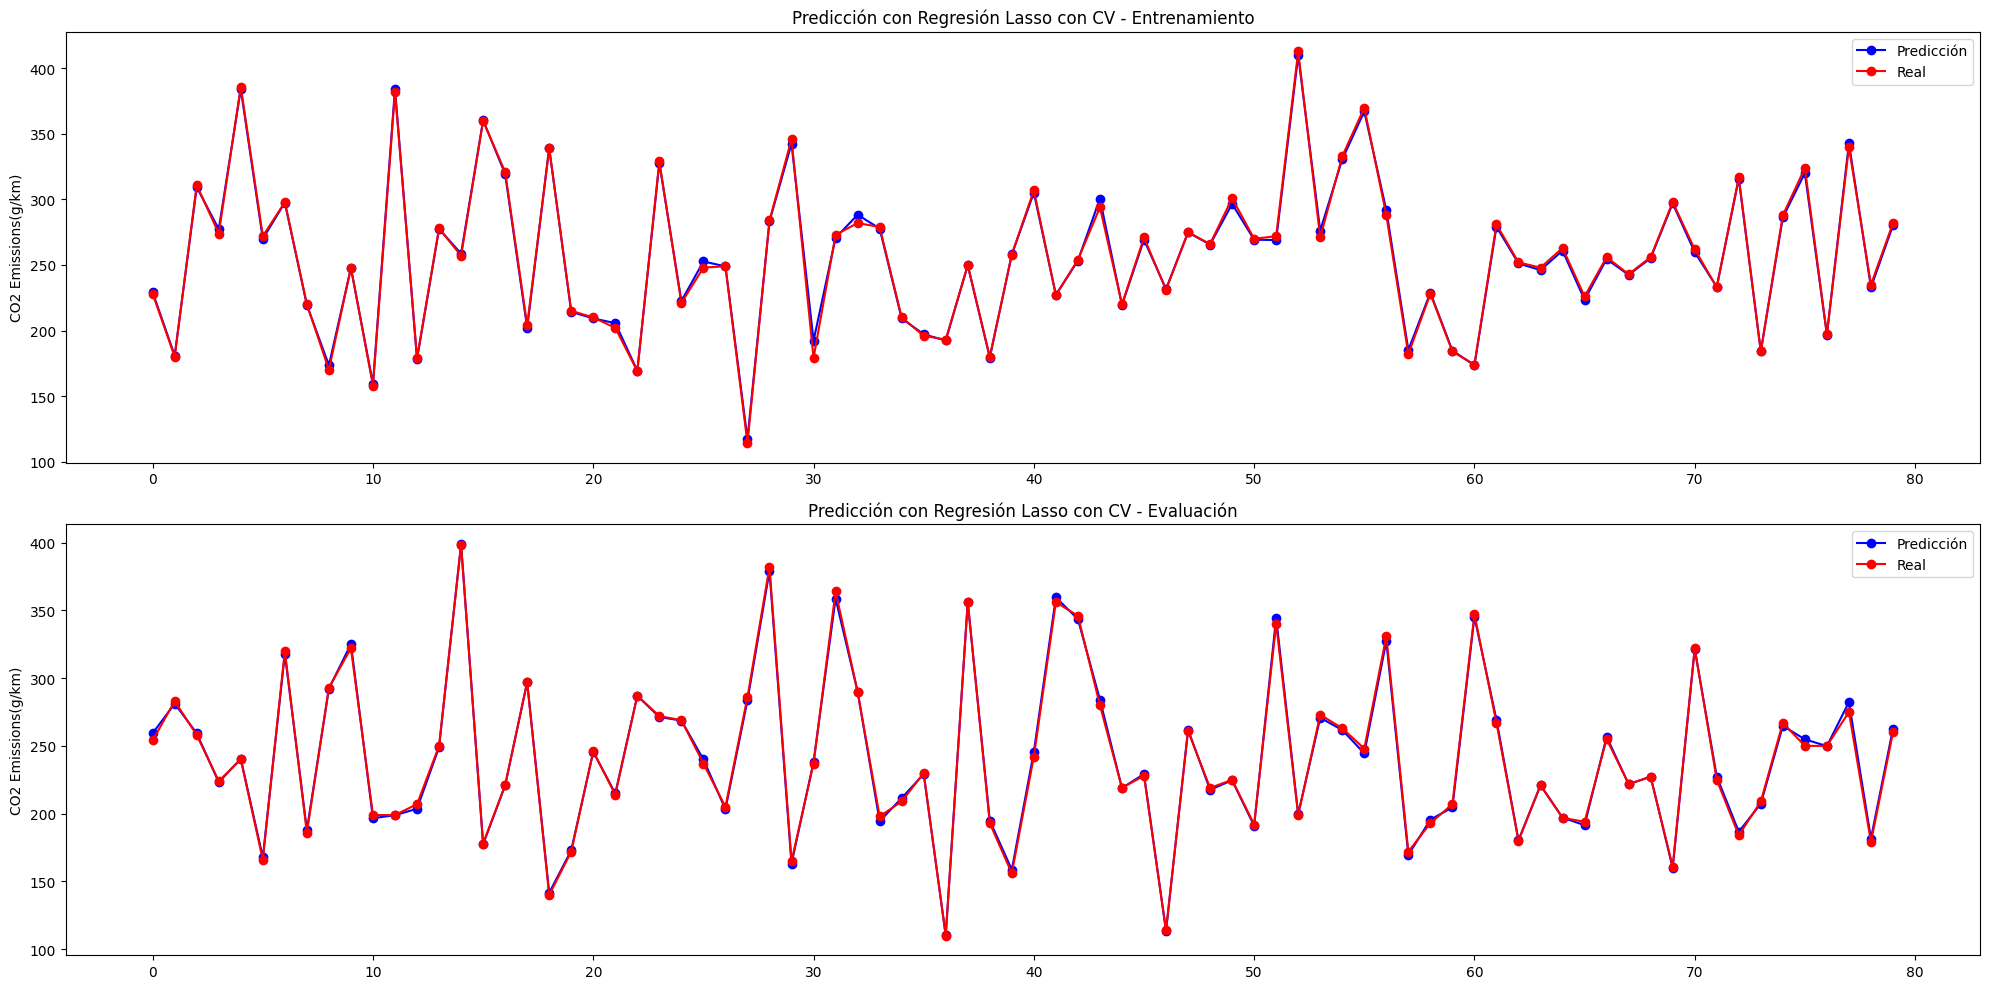

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

Ya con nuestro mejor modelo encontrado y teniendo un rendimiento esperado en producción, podremos determinar la importancia de las variables del modelo. Para ello se obtuvo el siguiente resultado.

In [ ]:
lasso_model = best_model['regression']
trans_df = best_model['transform'].transform(X_test)
fake_df = best_model['polinomial'].transform(trans_df)

cat_names = best_model['transform'].transformers_[1][1].get_feature_names_out()
num_names = best_model['transform'].transformers_[0][2]#.feature_names_in_
col_names = list(num_names) + list(cat_names)

print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: -0.6168392220006069


Variable  Parámetro
0                         Intercepto  -0.616839
1                     Engine Size(L)   0.000000
2                          Cylinders  25.700442
3   Fuel Consumption City (L/100 km)   2.176897
4    Fuel Consumption Hwy (L/100 km)   9.656862
..                               ...        ...
76                       Fuel Type_D   0.000000
77                       Fuel Type_E   0.000000
78                       Fuel Type_N  -0.000000
79                       Fuel Type_X  -0.000000
80                       Fuel Type_Z   0.000000

[81 rows x 2 columns]

### **3. Preguntas**

1. Cree un pipeline con el algoritmo de su seleccion donde incluya un minmaxScaler a las variables que aplique

```
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())  # Adicion acá
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)
```

2. ¿Cuáles son las diferencias entre regresión lineal con transformación polinomial y regresión regularizada Lasso?
3. ¿Qué otro espacio de búsqueda o hiperparámetros serían buenos de buscar en este modelo?.
4. La columna `Make` puede considerarse una variable de alta cardinalidad. ¿Cómo serían los resultados si se construye un modelo sin esta variable?